# 1. Defining Neural Networks in PyTorch

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import utils

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [3]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

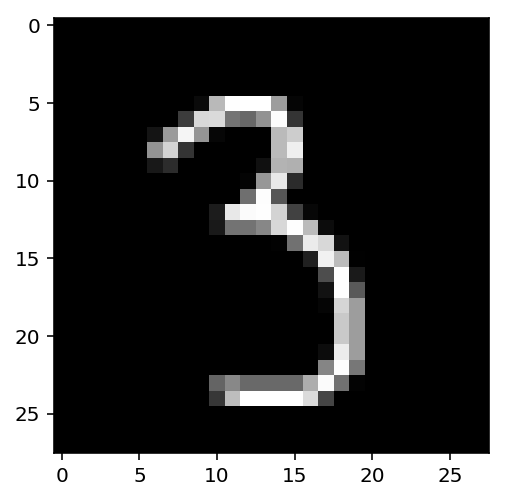

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

In [5]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fully_connected_1 = nn.Linear(784, 128)
        self.fully_connected_2 = nn.Linear(128, 64)
        self.fully_connected_3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.fully_connected_1(x)
        x = F.relu(x)
        x = self.fully_connected_2(x)
        x = F.relu(x)
        x = self.fully_connected_3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model

Network(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (fully_connected_3): Linear(in_features=64, out_features=10, bias=True)
)

In [6]:
print(model.fully_connected_1.weight)
print(model.fully_connected_1.bias)

Parameter containing:
tensor([[ 0.0159, -0.0146, -0.0154,  ...,  0.0102, -0.0017, -0.0290],
        [ 0.0278,  0.0295, -0.0153,  ...,  0.0070, -0.0114, -0.0256],
        [-0.0318,  0.0110,  0.0210,  ...,  0.0259,  0.0088, -0.0217],
        ...,
        [ 0.0153,  0.0093,  0.0354,  ..., -0.0063,  0.0357, -0.0077],
        [ 0.0260,  0.0182,  0.0113,  ...,  0.0044,  0.0288,  0.0325],
        [-0.0090, -0.0053, -0.0220,  ..., -0.0185, -0.0027,  0.0124]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0152, -0.0329, -0.0019,  0.0349, -0.0325,  0.0040, -0.0338, -0.0122,
         0.0167,  0.0193, -0.0161, -0.0030,  0.0351,  0.0061,  0.0292, -0.0148,
        -0.0048, -0.0336,  0.0198,  0.0341,  0.0039, -0.0301,  0.0098, -0.0344,
         0.0112, -0.0279, -0.0092,  0.0194,  0.0227, -0.0103,  0.0236,  0.0049,
         0.0309, -0.0187, -0.0234, -0.0007, -0.0222, -0.0062,  0.0205,  0.0278,
        -0.0063, -0.0076, -0.0149,  0.0256, -0.0341,  0.0071, -0.0292, -0.0277,
         0.0138

In [7]:
# Set biases to all 0s
model.fully_connected_1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [9]:
# Sample from random normal
model.fully_connected_1.weight.data.normal_(std=0.01)

tensor([[-0.0086, -0.0102,  0.0163,  ...,  0.0173,  0.0064, -0.0161],
        [ 0.0057,  0.0088,  0.0123,  ..., -0.0001, -0.0037, -0.0008],
        [-0.0042, -0.0045,  0.0149,  ...,  0.0002, -0.0021,  0.0018],
        ...,
        [ 0.0072, -0.0082,  0.0120,  ...,  0.0079, -0.0067, -0.0138],
        [-0.0022,  0.0010,  0.0032,  ...,  0.0051,  0.0040, -0.0145],
        [ 0.0194,  0.0284, -0.0094,  ...,  0.0085, -0.0042,  0.0064]])

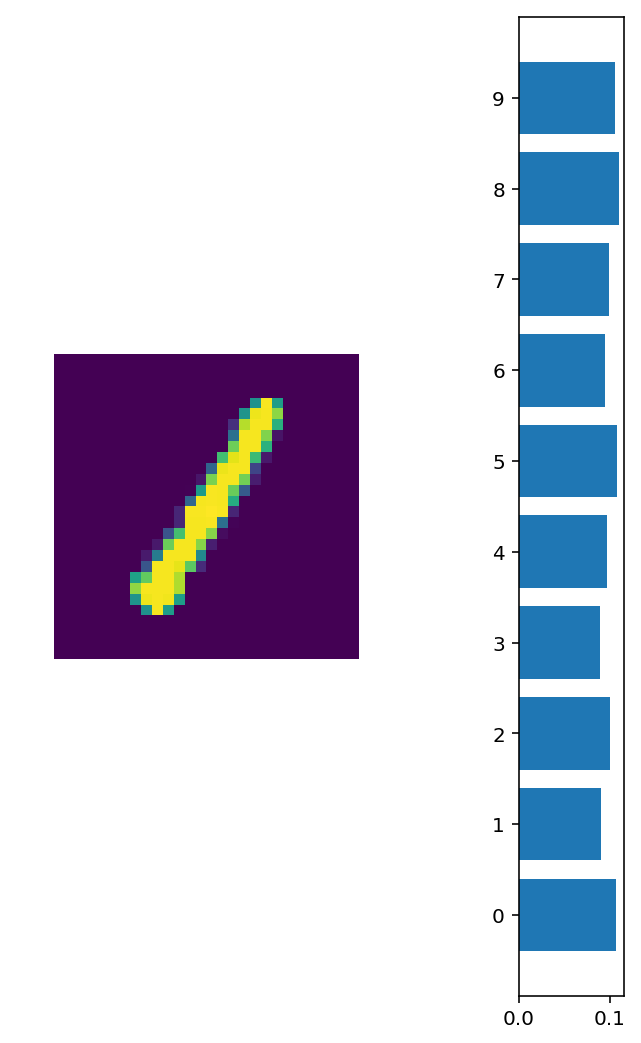

In [10]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

images.resize_(64, 1, 784)

image_index = 0
ps = model.forward(images[image_index, :])

image = images[image_index]
utils.view_classify(image.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


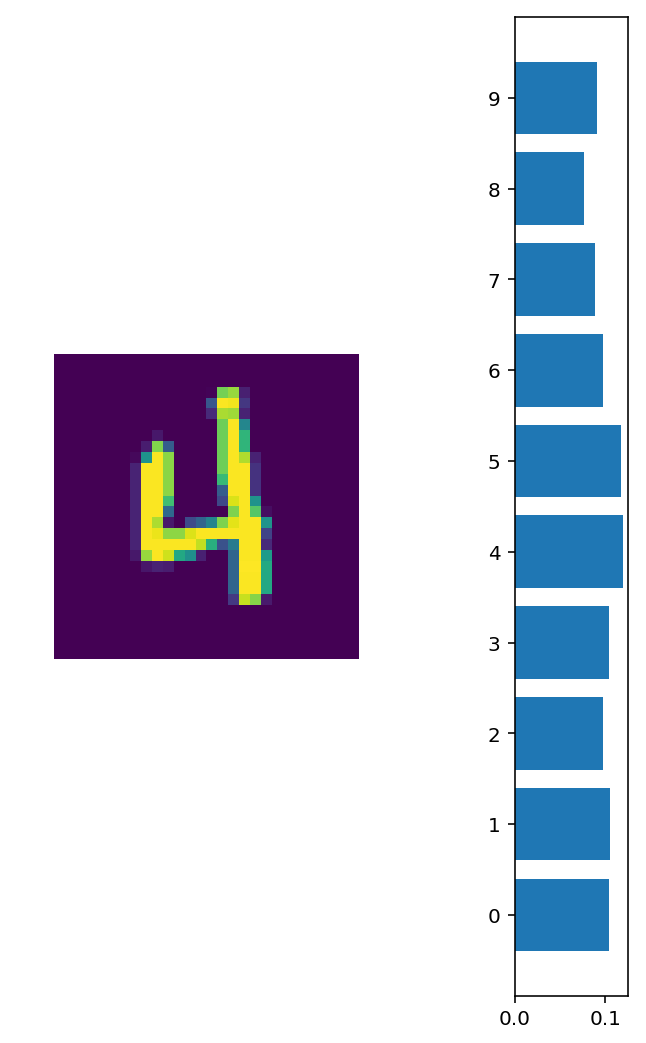

In [12]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)

In [14]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict(
        [('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
         ('relu_1', nn.ReLU()),
         ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
         ('relu_2', nn.ReLU()),
         ('output', nn.Linear(hidden_sizes[1], output_size)),
         ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (relu_2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [15]:
## TODO Define network here

In [ ]:
## TODO Run after completing the previous cell
images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)